# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Analysis

This project pulls weather information from 500 random cities in the world based on their latitude and longitude. I ran this code several times and observed that the data changes with every run. The total number of cities changes and the city name also changes. The last call pulled a total of 626 cities with max temp of 317.91 (F), max humidity of 100%, max Cloudiness of 100% and max Wind speed of 18.52mph. 

The cities had very high temperatures based how close or how far they are from the equator.

For the cities in the dataset, there was a strong relationship between Latitude and Max Temperature in the Southern Hemisphere as shown in the linear regression analysis. All other weather conditions such as Max Temperature, Cloudiness, humidity and Wind Speed did not show any relationship with Latitude in Northern Hemisphere, while in the Southern Hemisphere only Max Temperature showed a strong relationship with Latitude other weather conditions (Humidity, Cloudiness and Wind speed) did not show a relationship. 

The 626 cities pulled by these API call within the specified Longitude and Latitude are very hot cities because the statistics summary table shows the Max Temperature max as 317.91(F), min as 273.77(F), and the mean Max Temp as 295.13(F).

# Note: Country was spelt as County in my exported dataframe called Weather Data 2. Just in case this results in an error when the code is used especially in the Vacationpy notebook. Country and county are the same for this project.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Config information

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Partial query URL
query_url = f"{url}appid={weather_api_key}&units{units}&q="

In [4]:
# Lists to hold information
cityname = []
cloudiness = []
country = []
date = []
humidity =[]
latitude =[]
longitude =[]
maxtemp = []
windspeed = []

#processing Record Counter starts at 1

processing_record = 0
set_count = 1

#Print statement
print(f"Beginning Data Retrieval")
print(f"-----------------------------------------")

#loop requesting city data

for city in cities:
    
#handling exception for cities not found

    try:
        response = requests.get(query_url + city).json()
        cityname.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        windspeed.append(response["wind"]["speed"])
        city_record = response["name"]
            
        if processing_record <50:
            processing_record +=1
        else:
            set_count +=1
            processing_record =1
        print(f"Processing Record {processing_record} of set {set_count}| {city_record}")
            
        
    except:
        print("City not found. Skipping...")
    continue
print(f"--------------------------------------------")
print(f"Data Retrieval Complete")
print(f"--------------------------------------------")
                                  



Beginning Data Retrieval
-----------------------------------------
Processing Record 1 of set 1| Cherskiy
Processing Record 2 of set 1| Arman'
Processing Record 3 of set 1| Busselton
Processing Record 4 of set 1| Marialva
Processing Record 5 of set 1| Luleå
Processing Record 6 of set 1| East London
Processing Record 7 of set 1| Alofi
Processing Record 8 of set 1| Kristiansund
Processing Record 9 of set 1| Morant Bay
Processing Record 10 of set 1| Saint-Philippe
Processing Record 11 of set 1| Mäntsälä
Processing Record 12 of set 1| Ushuaia
Processing Record 13 of set 1| Hithadhoo
Processing Record 14 of set 1| Nikolayevsk-on-Amur
City not found. Skipping...
Processing Record 15 of set 1| Port Lincoln
Processing Record 16 of set 1| Cabo San Lucas
Processing Record 17 of set 1| Kiryat Gat
Processing Record 18 of set 1| Bundaberg
Processing Record 19 of set 1| Yellowknife
Processing Record 20 of set 1| Byron Bay
Processing Record 21 of set 1| Valkeala
Processing Record 22 of set 1| Carnarv

Processing Record 41 of set 4| Srednekolymsk
Processing Record 42 of set 4| Ilulissat
Processing Record 43 of set 4| Kalmunai
Processing Record 44 of set 4| Krechevitsy
Processing Record 45 of set 4| Changping
Processing Record 46 of set 4| St. George's
City not found. Skipping...
Processing Record 47 of set 4| Bowen
Processing Record 48 of set 4| Denizli Province
Processing Record 49 of set 4| Harlingen
Processing Record 50 of set 4| Bolobo
City not found. Skipping...
Processing Record 1 of set 5| Orangeburg
Processing Record 2 of set 5| Zhigansk
City not found. Skipping...
Processing Record 3 of set 5| Kamenka
City not found. Skipping...
Processing Record 4 of set 5| San Antonio
Processing Record 5 of set 5| Deputatsky
Processing Record 6 of set 5| Havøysund
Processing Record 7 of set 5| Itarema
Processing Record 8 of set 5| Hede
City not found. Skipping...
Processing Record 9 of set 5| Gizo Government Station
Processing Record 10 of set 5| Carpi
Processing Record 11 of set 5| Cairns

Processing Record 29 of set 8| Lagoa
Processing Record 30 of set 8| Kroya
Processing Record 31 of set 8| Poum
City not found. Skipping...
Processing Record 32 of set 8| Philadelphia
Processing Record 33 of set 8| Monywa
Processing Record 34 of set 8| Buala
Processing Record 35 of set 8| Rocha
Processing Record 36 of set 8| Faya
City not found. Skipping...
Processing Record 37 of set 8| Forsytheganj
Processing Record 38 of set 8| Esim
Processing Record 39 of set 8| Gubkinskiy
Processing Record 40 of set 8| Amahai
Processing Record 41 of set 8| Faanui
Processing Record 42 of set 8| Nanortalik
Processing Record 43 of set 8| Olafsvik
Processing Record 44 of set 8| Nemuro
Processing Record 45 of set 8| Bengkulu
Processing Record 46 of set 8| Port-Cartier
Processing Record 47 of set 8| Tura
Processing Record 48 of set 8| Derzhavīnsk
Processing Record 49 of set 8| Kultuk
Processing Record 50 of set 8| Huarmey
Processing Record 1 of set 9| Manggar
Processing Record 2 of set 9| Along
Processing

Processing Record 15 of set 12| Riohacha
Processing Record 16 of set 12| Bintulu
--------------------------------------------
Data Retrieval Complete
--------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# DataFrame
weather_dict = {
   "City": cityname,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windspeed,
    "County": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,County,Date
0,Cherskiy,68.7500,161.3000,274.60,94,15,7.89,RU,1627385932
1,Arman',59.7000,150.1667,288.29,66,78,2.75,RU,1627385932
2,Busselton,-33.6500,115.3333,282.64,62,93,6.70,AU,1627385933
3,Marialva,-23.4850,-51.7917,292.41,41,22,1.75,BR,1627385933
4,Luleå,65.5842,22.1547,295.19,60,0,4.12,SE,1627385934


In [6]:
#Exporting data and writing the csv
output_file = ("../output_Data/Weather Data 2") #'../output_data/City Latitude vs. Max Temperature.png'
with open(output_file, "w") as file:
    weather_data.to_csv(output_file, index=False)

In [7]:
weather_data.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,19.419262,20.762009,295.125459,67.775618,54.233216,3.785919,1.627386e+09
std,33.814371,89.921961,8.367159,24.217616,38.182404,2.712647,8.491802e+01
min,-54.800000,-175.200000,273.770000,5.000000,0.000000,0.000000,1.627386e+09
25%,-8.744825,-56.373300,290.047500,57.250000,12.250000,1.772500,1.627386e+09
50%,23.643450,23.160800,296.775000,75.000000,65.000000,3.410000,1.627386e+09
75%,48.895850,100.422625,300.255000,87.000000,90.000000,5.147500,1.627386e+09
max,78.218600,179.316700,317.910000,100.000000,100.000000,18.520000,1.627386e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

Based on the summary weather statistics above, max humidity for cities in the weather data dataframe is 100%. Therefore there are no cities where the humidity is greater than 100%. Skipping this step. 

In [39]:
#  Get the indices of cities that have humidity over 100%.
# 

In [8]:
#weather_data = pd.DataFrame(weather_dict)
quartiles = weather_data['Humidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of humidity is: {lowerq}")
print(f"The upper quartile of humidity is: {upperq}")
print(f"The interquartile range for humidity is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_humidity = weather_data.loc[(weather_data['Humidity'] < lower_bound) | (weather_data['Humidity'] > upper_bound)]
outlier_humidity

The lower quartile of humidity is: 57.25
The upper quartile of humidity is: 87.0
The interquartile range for humidity is: 29.75
Values below 12.625 could be outliers.
Values above 131.625 could be outliers.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,County,Date
39,Walvis Bay,-22.9575,14.5053,305.68,12,0,6.17,NA,1627385948
67,Baharly,38.4362,57.4316,313.24,12,0,5.39,TM,1627385958
71,Korla,41.7597,86.1469,311.24,11,0,2.79,CN,1627385960
95,Birjand,32.8663,59.2211,308.41,10,0,10.80,IR,1627385969
213,Taoudenni,22.6783,-3.9836,317.81,5,11,0.35,ML,1627386019
223,Gazojak,41.1875,61.4036,311.33,11,0,8.79,TM,1627386023
228,Arys,42.4252,68.7950,310.27,12,0,11.17,KZ,1627386026
259,Yumen,40.2833,97.2000,304.64,11,17,5.45,CN,1627386039
315,Sarakhs,36.5449,61.1577,312.23,11,0,18.52,IR,1627386063
320,Kumul,42.8000,93.4500,310.68,10,53,6.43,CN,1627386065


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

outlier_drop = weather_data[(weather_data['Humidity'] <= 12.625) | (weather_data['Humidity'] >= 131.625)].index
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = pd.DataFrame(weather_data.drop(outlier_drop, inplace=False))
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,County,Date
0,Cherskiy,68.7500,161.3000,274.60,94,15,7.89,RU,1627385932
1,Arman',59.7000,150.1667,288.29,66,78,2.75,RU,1627385932
2,Busselton,-33.6500,115.3333,282.64,62,93,6.70,AU,1627385933
3,Marialva,-23.4850,-51.7917,292.41,41,22,1.75,BR,1627385933
4,Luleå,65.5842,22.1547,295.19,60,0,4.12,SE,1627385934
...,...,...,...,...,...,...,...,...,...
561,Glenwood Springs,39.5505,-107.3248,293.72,68,1,0.00,US,1627386166
562,Aykhal,66.0000,111.5000,301.04,43,20,2.48,RU,1627386166
563,Opuwo,-18.0607,13.8400,297.46,18,0,5.50,NA,1627386167
564,Riohacha,11.5444,-72.9072,299.33,87,94,3.70,CO,1627386100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<ipython-input-10-6c08b7776f59>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Max Temperature' +  '(' + str(pd.datetime.now().date()) + ')', fontsize=15)


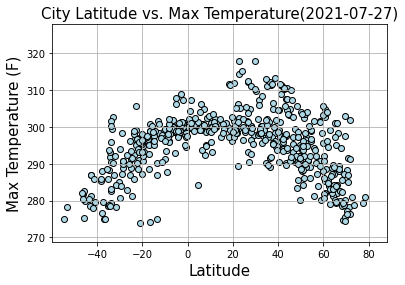

In [10]:
# All cities scatter plot for latitude and max temperature  
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker='o', edgecolors='black', color='lightblue')

# set limits for x axis
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+10)

# set limits for y axis
plt.ylim(min(weather_data['Max Temp'])-5, max(weather_data['Max Temp'])+10)

# Titles and labels
plt.xlabel('Latitude', fontsize=15, color='black')
plt.ylabel('Max Temperature (F)', fontsize=15, color='black')
plt.title('City Latitude vs. Max Temperature' +  '(' + str(pd.datetime.now().date()) + ')', fontsize=15)
plt.grid(True)

#save plot image 
plt.savefig('../output_data/City Latitude vs. Max Temperature1.png')

#show plot

plt.show()


## Latitude vs. Humidity Plot

<ipython-input-11-e27d73bab0ac>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Humidity' +  '(' + str(pd.datetime.now().date()) + ')', fontsize=15)


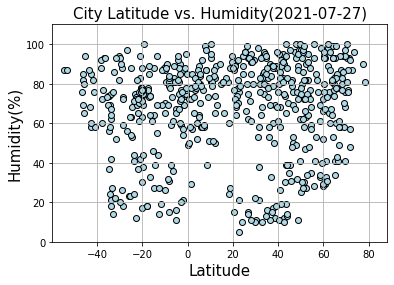

In [11]:
# All cities scatter plot for latitude and humidity  
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker='o', edgecolors='black', color='lightblue')

# set limits for x axis
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+10)

# set limits for y axis
plt.ylim(min(weather_data['Humidity'])-5, max(weather_data['Humidity'])+10)

# Titles and labels
plt.xlabel('Latitude', fontsize=15, color='black')
plt.ylabel('Humidity(%)', fontsize=15, color='black')
plt.title('City Latitude vs. Humidity' +  '(' + str(pd.datetime.now().date()) + ')', fontsize=15)
plt.grid(True)

#save plot image 
plt.savefig('../output_data/City Latitude vs. Humidity1.png')

#show plot

plt.show()


## Latitude vs. Cloudiness Plot

<ipython-input-12-c698df959c7f>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Cloudiness' + '(' + str(pd.datetime.now().date()) + ')', fontsize=15)


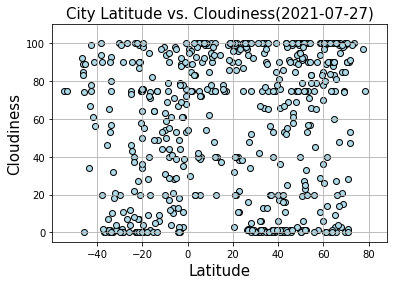

In [12]:
# All cities scatter plot for latitude and cloudiness 
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker='o', edgecolors='black', color='lightblue')

# set limits for x axis
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+10)

# set limits for y axis
plt.ylim(min(weather_data['Cloudiness'])-5, max(weather_data['Cloudiness'])+10)

# Titles and labels
plt.xlabel('Latitude', fontsize=15, color='black')
plt.ylabel('Cloudiness', fontsize=15, color='black')
plt.title('City Latitude vs. Cloudiness' + '(' + str(pd.datetime.now().date()) + ')', fontsize=15)
plt.grid(True)

#save plot image 
plt.savefig('../output_data/City Latitude vs. Cloudiness1.png')

#show plot

plt.show()


## Latitude vs. Wind Speed Plot

<ipython-input-13-095f933008e6>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Wind Speed' + '(' + str(pd.datetime.now().date()) + ')', fontsize=15)


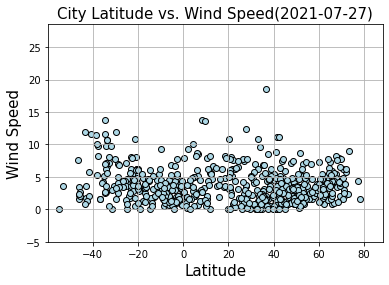

In [13]:
# All cities scatter plot for latitude and wind speed  
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker='o', edgecolors='black', color='lightblue')

# set limits for x axis
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+10)

# set limits for y axis
plt.ylim(min(weather_data['Wind Speed'])-5, max(weather_data['Wind Speed'])+10)

# Titles and labels
plt.xlabel('Latitude', fontsize=15, color='black')
plt.ylabel('Wind Speed', fontsize=15, color='black')
plt.title('City Latitude vs. Wind Speed' + '(' + str(pd.datetime.now().date()) + ')', fontsize=15)
plt.grid(True)

#save plot image 
plt.savefig('../output_data/City Latitude vs. Wind Speed1.png')

#show plot

plt.show()


## Linear Regression

In [14]:
# Dataframe for Northern Hemisphere (lat >=0 degree)

Northern_wd = weather_data[weather_data['Lat']>=0]
Northern_wd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,County,Date
0,Cherskiy,68.7500,161.3000,274.60,94,15,7.89,RU,1627385932
1,Arman',59.7000,150.1667,288.29,66,78,2.75,RU,1627385932
4,Luleå,65.5842,22.1547,295.19,60,0,4.12,SE,1627385934
7,Kristiansund,63.1115,7.7320,299.18,60,0,4.63,NO,1627385935
8,Morant Bay,17.8815,-76.4093,299.94,81,99,3.50,JM,1627385806
...,...,...,...,...,...,...,...,...,...
560,Norfolk,42.1668,-71.2495,296.74,81,16,2.62,US,1627386165
561,Glenwood Springs,39.5505,-107.3248,293.72,68,1,0.00,US,1627386166
562,Aykhal,66.0000,111.5000,301.04,43,20,2.48,RU,1627386166
564,Riohacha,11.5444,-72.9072,299.33,87,94,3.70,CO,1627386100


In [15]:
# Dataframe for Northern Hemisphere (lat < 0 degree)

Southern_wd = weather_data[weather_data['Lat']<0]
Southern_wd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,County,Date
2,Busselton,-33.6500,115.3333,282.64,62,93,6.70,AU,1627385933
3,Marialva,-23.4850,-51.7917,292.41,41,22,1.75,BR,1627385933
5,East London,-33.0153,27.9116,302.67,14,0,7.20,ZA,1627385934
6,Alofi,-19.0595,-169.9187,293.09,100,55,0.00,NU,1627385934
9,Saint-Philippe,-21.3585,55.7679,296.90,75,99,5.23,RE,1627385935
...,...,...,...,...,...,...,...,...,...
547,Pisco,-13.7000,-76.2167,287.05,94,75,0.51,PE,1627386160
551,Plettenberg Bay,-34.0527,23.3716,295.78,42,0,3.53,ZA,1627386162
556,Alice Springs,-23.7000,133.8833,298.90,24,8,5.66,AU,1627386164
557,Caucaia,-3.7361,-38.6531,300.97,67,0,6.69,BR,1627385991


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.32343033


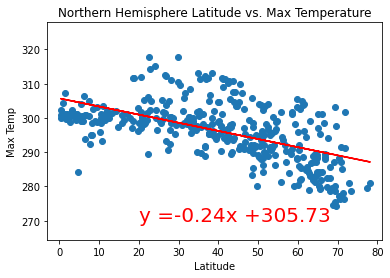

In [38]:
# x and y values
x_values = Northern_wd['Lat']
y_values = Northern_wd['Max Temp']

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values

regress_values = x_values * slope + intercept

#line equation

line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

#correlation coefficient
#correlation_coef = st.pearsonr(x_values, y_values)

# plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20, 270), fontsize=20, color='red')

#Title and labels

plt.xlabel('Latitude', fontsize=10, color='black')
plt.ylabel('Max Temp', fontsize=10, color='black')
plt.title('Northern Hemisphere Latitude vs. Max Temperature')

# set x and y limits

plt.xlim(-3, max(Northern_wd['Lat'])+3)
plt.ylim(min(Northern_wd['Max Temp'])-10, max(Northern_wd['Max Temp'])+10)

# r-value and correlarion coefficient

print(f"The r-value is: {round(rvalue**2,8)}")
#print(f"The correlation between Latitude and Temperature in the Northern Hemisphere is {round(correlation_coef[0],2)}")


plt.savefig('../output_Data/City Latitude vs. Max Temperature - Northern Hemisphere.png') # '../output_data/City Latitude vs. Max Temperature.png'

# Display plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: (1, 8)


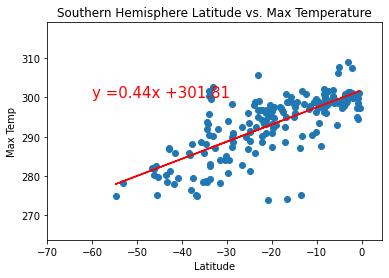

In [35]:
# x and y values
x_values = Southern_wd['Lat']
y_values = Southern_wd['Max Temp']

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values

regress_values = x_values * slope + intercept

#line equation

line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

#correlation coefficient
#correlation_coef = st.pearsonr(x_values, y_values)

# plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-60, 300), fontsize=15, color='red')

#Title and labels

plt.xlabel('Latitude', fontsize=10, color='black')
plt.ylabel('Max Temp', fontsize=10, color='black')
plt.title('Southern Hemisphere Latitude vs. Max Temperature')

# set x and y limits

plt.xlim(-70, max(Southern_wd['Lat'])+5)
plt.ylim(min(Southern_wd['Max Temp'])-10, max(Southern_wd['Max Temp'])+10)

# r-value and correlarion coefficient

print(f"The r-value is: {round(rvalue**2,8)}")
#print(f"The correlation between Latitude and Temperature in the Southern Hemisphere is {round(correlation_coef[0],2)}")


plt.savefig('../output_Data/City Latitude vs. Max Temperature - Southern Hemisphere.png')

# Display plot
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 1.134e-05


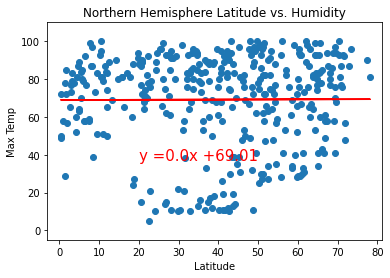

In [31]:
# x and y values
x_values = Northern_wd['Lat']
y_values = Northern_wd['Humidity']

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values

regress_values = x_values * slope + intercept

#line equation

line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

#correlation coefficient
#correlation_coef = st.pearsonr(x_values, y_values)

# plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20, 37), fontsize=15, color='red')

#Title and labels

plt.xlabel('Latitude', fontsize=10, color='black')
plt.ylabel('Max Temp', fontsize=10, color='black')
plt.title('Northern Hemisphere Latitude vs. Humidity')

# set x and y limits

plt.xlim(-3, max(Northern_wd['Lat'])+3)
plt.ylim(min(Northern_wd['Humidity'])-10, max(Northern_wd['Humidity'])+10)

# r-value and correlarion coefficient

print(f"The r-value is: {round(rvalue**2,8)}")
#print(f"The correlation between Latitude and Humidity in the Northern Hemisphere is {round(correlation_coef[0],2)}")


plt.savefig('../output_Data/City Latitude vs. Humidity - Northern Hemisphere.png')

# Display plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00019713


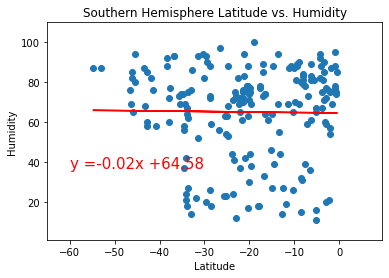

In [34]:
# x and y values
x_values = Southern_wd['Lat']
y_values = Southern_wd['Humidity']

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values

regress_values = x_values * slope + intercept

#line equation

line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

#correlation coefficient
#correlation_coef = st.pearsonr(x_values, y_values)

# plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-60, 37), fontsize=15, color='red')

#Title and labels

plt.xlabel('Latitude', fontsize=10, color='black')
plt.ylabel('Humidity', fontsize=10, color='black')
plt.title('Southern Hemisphere Latitude vs. Humidity')

# set x and y limits

plt.xlim(-65, max(Southern_wd['Lat'])+10)
plt.ylim(min(Southern_wd['Humidity'])-10, max(Southern_wd['Humidity'])+10)

# r-value and correlarion coefficient

print(f"The r-value is: {round(rvalue**2,8)}")
#print(f"The correlation between Latitude and Humidity in the Southern Hemisphere is {round(correlation_coef[0],2)}")


plt.savefig('../output_Data/City Latitude vs. Humidity - Southern Hemisphere.png')

# Display plot
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00161076


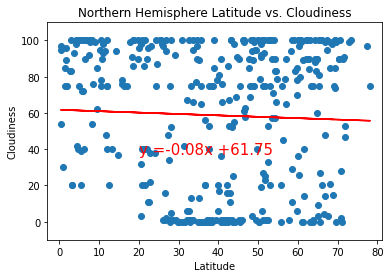

In [33]:
# x and y values
x_values = Northern_wd['Lat']
y_values = Northern_wd['Cloudiness']

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values

regress_values = x_values * slope + intercept

#line equation

line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

#correlation coefficient
#correlation_coef = st.pearsonr(x_values, y_values)

# plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20, 37), fontsize=15, color='red')

#Title and labels

plt.xlabel('Latitude', fontsize=10, color='black')
plt.ylabel('Cloudiness', fontsize=10, color='black')
plt.title('Northern Hemisphere Latitude vs. Cloudiness')

# set x and y limits

plt.xlim(-3, max(Northern_wd['Lat'])+3)
plt.ylim(min(Northern_wd['Cloudiness'])-10, max(Northern_wd['Cloudiness'])+10)

# r-value and correlarion coefficient

print(f"The r-value is: {round(rvalue**2,8)}")
#print(f"The correlation between Latitude and Cloudiness in the Northern Hemisphere is {round(correlation_coef[0],2)}")


plt.savefig('../output_Data/City Latitude vs. Cloudiness - Northern Hemisphere.png')

# Display plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00052658


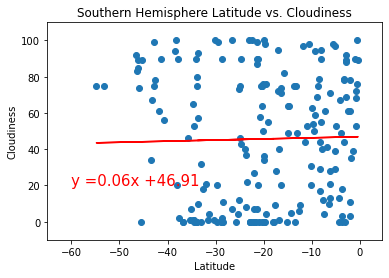

In [39]:
# x and y values
x_values = Southern_wd['Lat']
y_values = Southern_wd['Cloudiness']

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values

regress_values = x_values * slope + intercept

#line equation

line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

#correlation coefficient
#correlation_coef = st.pearsonr(x_values, y_values)

# plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-60, 20), fontsize=15, color='red')

#Title and labels

plt.xlabel('Latitude', fontsize=10, color='black')
plt.ylabel('Cloudiness', fontsize=10, color='black')
plt.title('Southern Hemisphere Latitude vs. Cloudiness')

# set x and y limits

plt.xlim(-65, max(Southern_wd['Lat'])+5)
plt.ylim(min(Southern_wd['Cloudiness'])-10, max(Southern_wd['Cloudiness'])+10)

# r-value and correlarion coefficient

print(f"The r-value is: {round(rvalue**2,8)}")
#print(f"The correlation between Latitude and Clouidness in the Southern Hemisphere is {round(correlation_coef[0],2)}")


plt.savefig('../output_Data/City Latitude vs. Clouidness - Southern Hemisphere.png')

# Display plot
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00202726


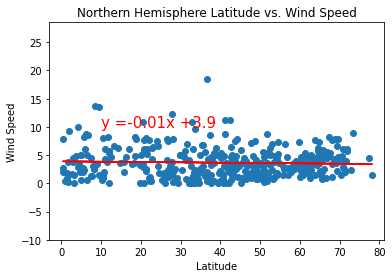

In [40]:
# x and y values
x_values = Northern_wd['Lat']
y_values = Northern_wd['Wind Speed']

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values

regress_values = x_values * slope + intercept

#line equation

line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

#correlation coefficient
#correlation_coef = st.pearsonr(x_values, y_values)

# plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 10), fontsize=15, color='red')

#Title and labels

plt.xlabel('Latitude', fontsize=10, color='black')
plt.ylabel('Wind Speed', fontsize=10, color='black')
plt.title('Northern Hemisphere Latitude vs. Wind Speed')

# set x and y limits

plt.xlim(-3, max(Northern_wd['Lat'])+3)
plt.ylim(min(Northern_wd['Wind Speed'])-10, max(Northern_wd['Wind Speed'])+10)

# r-value and correlarion coefficient

print(f"The r-value is: {round(rvalue**2,8)}")
#print(f"The correlation between Latitude and Wind Speed in the Northern Hemisphere is {round(correlation_coef[0],2)}")


plt.savefig('../output_Data/City Latitude vs. Wind Speed - Northern Hemisphere.png')

# Display plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09813647


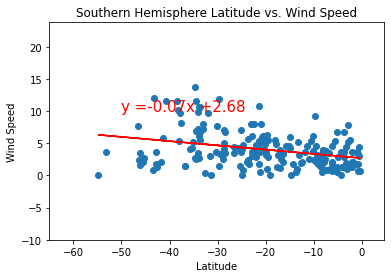

In [41]:
# x and y values
x_values = Southern_wd['Lat']
y_values = Southern_wd['Wind Speed']

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values

regress_values = x_values * slope + intercept

#line equation

line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

#correlation coefficient
#correlation_coef = st.pearsonr(x_values, y_values)

# plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 10), fontsize=15, color='red')

#Title and labels

plt.xlabel('Latitude', fontsize=10, color='black')
plt.ylabel('Wind Speed', fontsize=10, color='black')
plt.title('Southern Hemisphere Latitude vs. Wind Speed')

# set x and y limits

plt.xlim(-65, max(Southern_wd['Lat'])+5)
plt.ylim(min(Southern_wd['Wind Speed'])-10, max(Southern_wd['Wind Speed'])+10)

# r-value and correlarion coefficient

print(f"The r-value is: {round(rvalue**2,8)}")
#print(f"The correlation between Latitude and Wind Speed in the Southern Hemisphere is {round(correlation_coef[0],2)}")


plt.savefig('../output_Data/City Latitude vs. Wind Speed - Southern Hemisphere.png')

# Display plot
plt.show()
